In [63]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [64]:
# Hiding warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [65]:
# File to load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinical_trial_data.csv"

In [66]:
# Reading the data
mouse_drug_df = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_df = pd.read_csv("data/clinical_trial_data.csv")

In [67]:
# Combining the data into a single dataset
combined_data = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID", how="outer")

In [68]:
# Displaying the data table for preview
combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [69]:
# Storing the mean Tumor Volume data grouped by Drug and Timepoint
average_tumor_volume = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Converting to DataFrame
average_tumor_volume = pd.DataFrame(average_tumor_volume)
# Previewing DataFrame
average_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [70]:
# Storing the standard error of Tumor Volumes grouped by Drug and Timepoint
standard_error_tumor = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
# Converting to DataFrame
standard_error_tumor = pd.DataFrame(standard_error_tumor)
# Previewing DataFrame
standard_error_tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [71]:
# Minor data munging to re-format the DataFrames
average_tumor_volume = average_tumor_volume.reset_index()
average_tumor_volume_pivot = average_tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
standard_error_tumor = standard_error_tumor.reset_index()
standard_error_tumor_pivot = standard_error_tumor.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Previewing that reformatting worked
average_tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


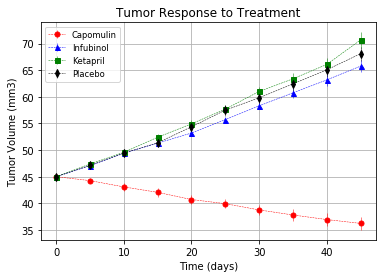

In [72]:
# Generating the plot (with error bars)
plt.errorbar(average_tumor_volume_pivot.index, average_tumor_volume_pivot["Capomulin"], yerr=standard_error_tumor_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(average_tumor_volume_pivot.index, average_tumor_volume_pivot["Infubinol"], yerr=standard_error_tumor_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(average_tumor_volume_pivot.index, average_tumor_volume_pivot["Ketapril"], yerr=standard_error_tumor_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(average_tumor_volume_pivot.index, average_tumor_volume_pivot["Placebo"], yerr=standard_error_tumor_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Saving the figure
plt.savefig("images/TumorResponse.png")

## Metastatic Response to Treatment

In [73]:
# Storing the mean Met. Sites data grouped by Drug and Timepoint
average_metastatic_sites = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Converting to DataFrame
average_metastatic_sites = pd.DataFrame(average_metastatic_sites)
# Previewing DataFrame
average_metastatic_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [74]:
# Storing the standard error associated with Met. Sites grouped by Drug and Timepoint
standard_error_met = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
# Converting to DataFrame
standard_error_met = pd.DataFrame(standard_error_met)
# Previewing DataFrame
standard_error_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [75]:
# Minor data munging to re-format the DataFrames
average_metastatic_sites = average_metastatic_sites.reset_index()
average_metastatic_sites_pivot = average_metastatic_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
standard_error_met = standard_error_met.reset_index()
standard_error_met_pivot = standard_error_met.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Previewing that reformatting worked
average_tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


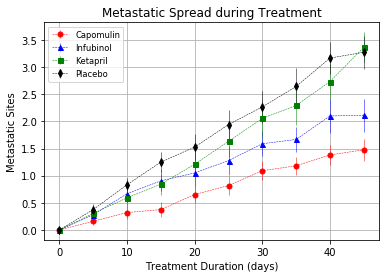

In [76]:
# Generating the plot (with error bars)
plt.errorbar(average_metastatic_sites_pivot.index, average_metastatic_sites_pivot["Capomulin"], yerr=standard_error_met_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(average_metastatic_sites_pivot.index, average_metastatic_sites_pivot["Infubinol"], yerr=standard_error_met_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(average_metastatic_sites_pivot.index, average_metastatic_sites_pivot["Ketapril"], yerr=standard_error_met_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(average_metastatic_sites_pivot.index, average_metastatic_sites_pivot["Placebo"], yerr=standard_error_met_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
plt.title("Metastatic Spread during Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Metastatic Sites")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Saving the figure
plt.savefig("images/MetastaticSpread.png")
# Showing the figure
plt.show()

## Survival Rates

In [77]:
# Storing the count of Mice grouped by Drug and Timepoint (W can pass any metric)
survival_count = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].count()
# Converting to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})
# Previewing DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [78]:
# Minor data munging to re-format the DataFrames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
# Previewing the DataFrame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


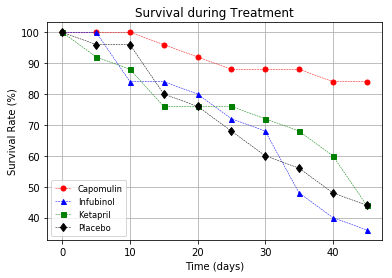

In [79]:
# Generating the plot (accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival during Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Saving the figure
plt.savefig("images/Survival.png")
# Showing the figure
plt.show()

## Summary Bar Graph

In [80]:
# Calculating the percent changes for each drug
tumor_percent_changes = 100 * (average_tumor_volume_pivot.iloc[-1] - average_tumor_volume_pivot.iloc[0]) / average_tumor_volume_pivot.iloc[0]
tumor_percent_changes_pivot = 100 * (standard_error_tumor_pivot.iloc[-1] - standard_error_tumor_pivot.iloc[0]) / standard_error_tumor_pivot.iloc[0]
# Displaying the data to confirm
tumor_percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

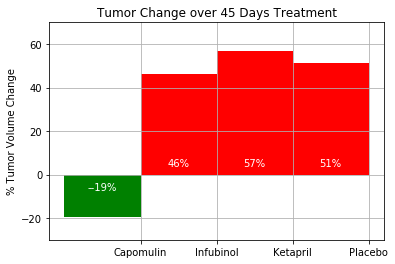

In [81]:
# Storing all relevant percent changes into a tuple
percent_changes = (tumor_percent_changes["Capomulin"], tumor_percent_changes["Infubinol"],
                   tumor_percent_changes["Ketapril"], tumor_percent_changes["Placebo"])
# Splicing the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))
width = 1
rectsPass = ax.bar(ind[0], percent_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], percent_changes[1:], width, color='red')
# Orienting widths. Adding labels, tick marks, etc.
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change over 45 Days Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)
# Using functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., -8,
                '-%d%%' % int(height),
                ha='center', va='bottom', color="white")
# Calling functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)
# Saving the figure
fig.savefig("images/TumorChange.png")
# Showing the figure
fig.show()